In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv(r'..\data\processed\average-monthly-surface-temperature.csv')
df.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032532,11.327663
1,Afghanistan,AFG,1940,1940-02-15,-0.733493,11.327663
2,Afghanistan,AFG,1940,1940-03-15,1.999123,11.327663
3,Afghanistan,AFG,1940,1940-04-15,10.199740,11.327663
4,Afghanistan,AFG,1940,1940-05-15,17.942116,11.327663


In [6]:
df.columns

Index(['Entity', 'Code', 'year', 'Day', 'Average surface temperature',
       'Average surface temperature.1'],
      dtype='object')

In [9]:
df.dtypes

Entity                                   object
Code                                     object
year                                      int64
Day                              datetime64[ns]
Average surface temperature             float64
Average surface temperature.1           float64
dtype: object

In [8]:
df['Day']=pd.to_datetime(df['Day'])

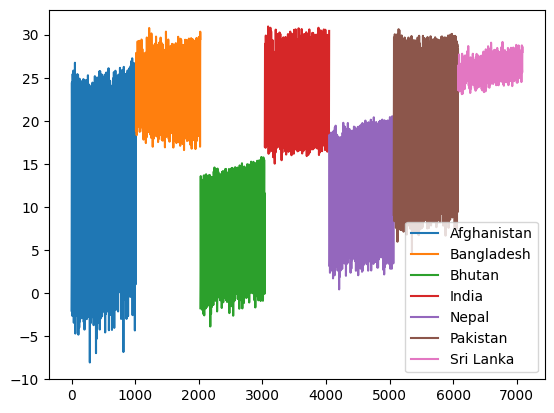

In [11]:
# for each entity how AverageTemperature has changed over time. plot this
df.groupby('Entity')['Average surface temperature'].plot(legend=True)
plt.show()

<Figure size 640x480 with 0 Axes>

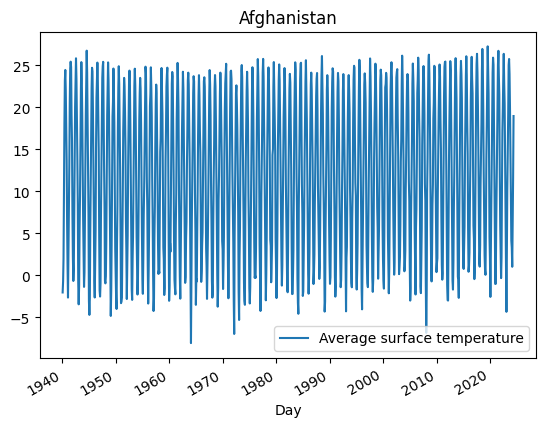

<Figure size 640x480 with 0 Axes>

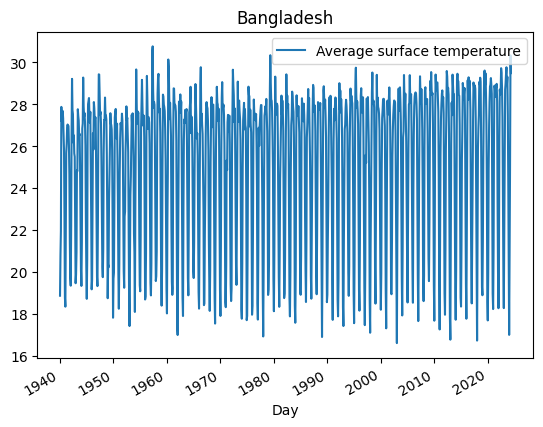

<Figure size 640x480 with 0 Axes>

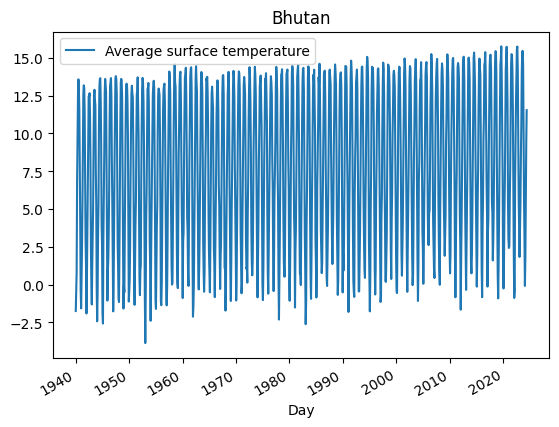

<Figure size 640x480 with 0 Axes>

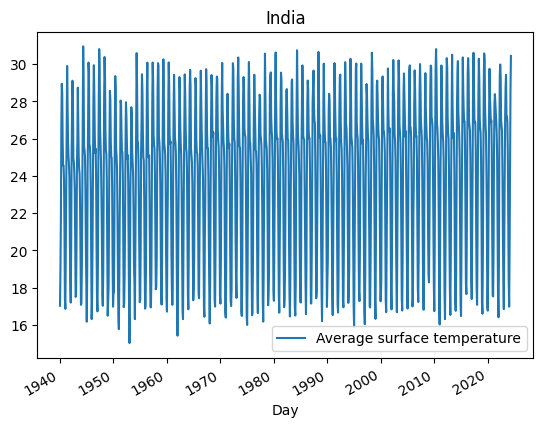

<Figure size 640x480 with 0 Axes>

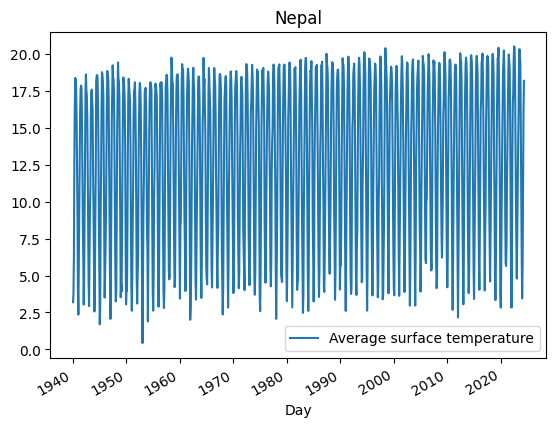

<Figure size 640x480 with 0 Axes>

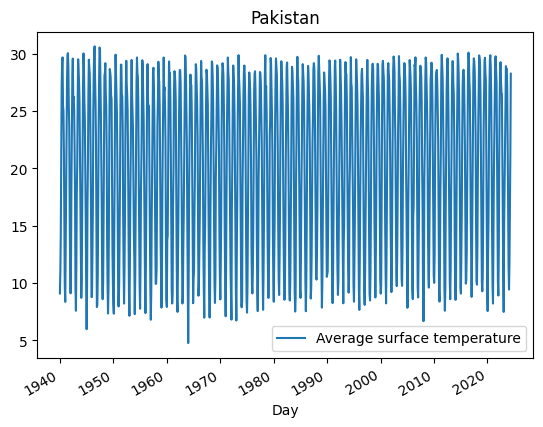

<Figure size 640x480 with 0 Axes>

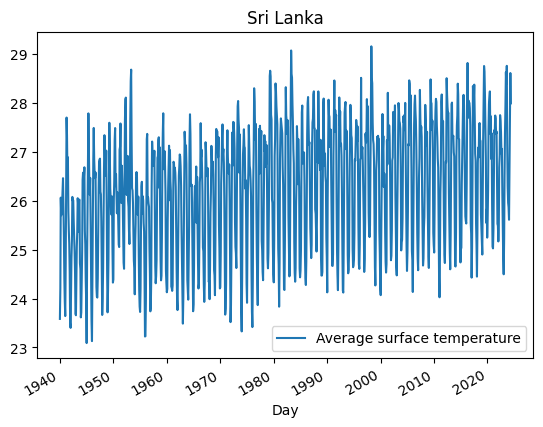

In [13]:
# plot in separate plots
for entity, data in df.groupby('Entity'):
    plt.figure()
    data.plot(x='Day', y='Average surface temperature', title=entity)
    plt.show()

<Axes: xlabel='Entity', ylabel='Average surface temperature'>

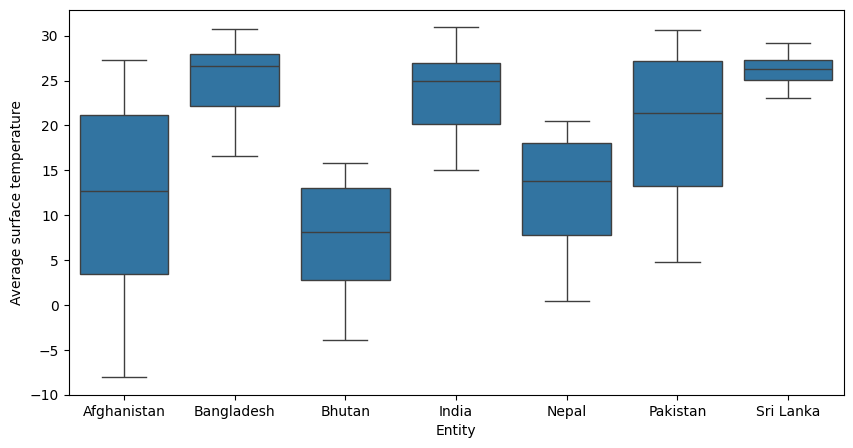

In [17]:
# draw a boxplot for each entity
# increase the size of the plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Entity', y='Average surface temperature')

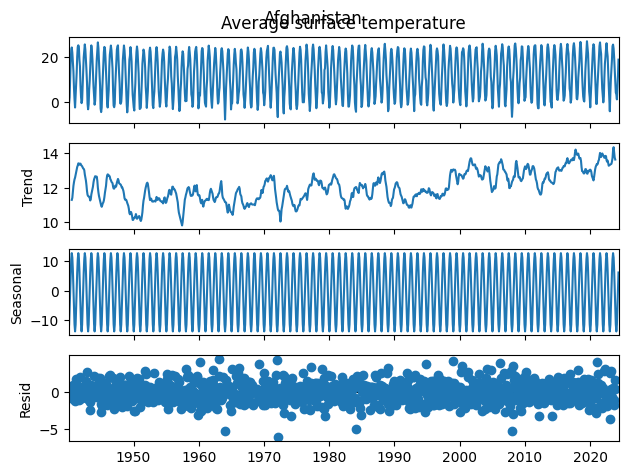

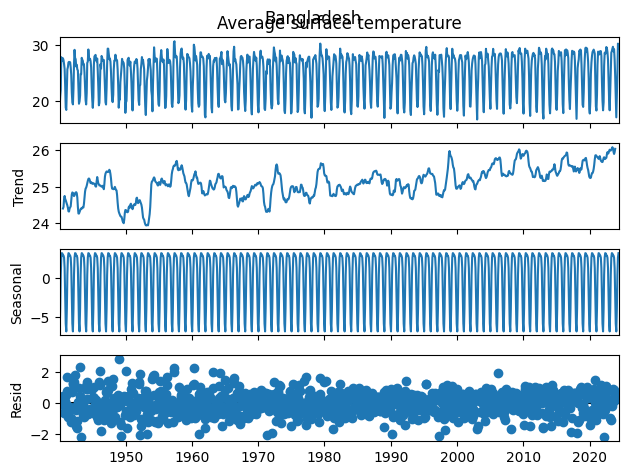

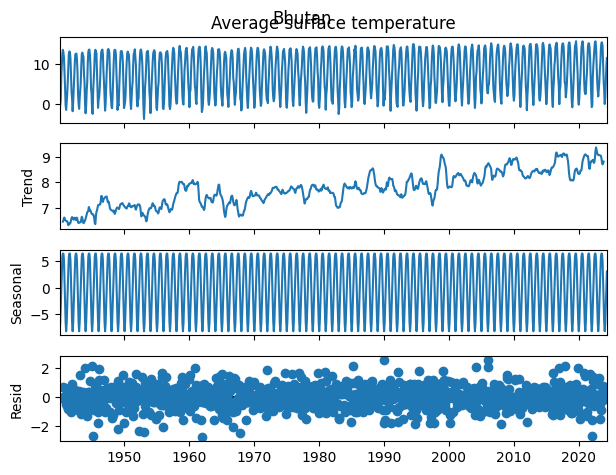

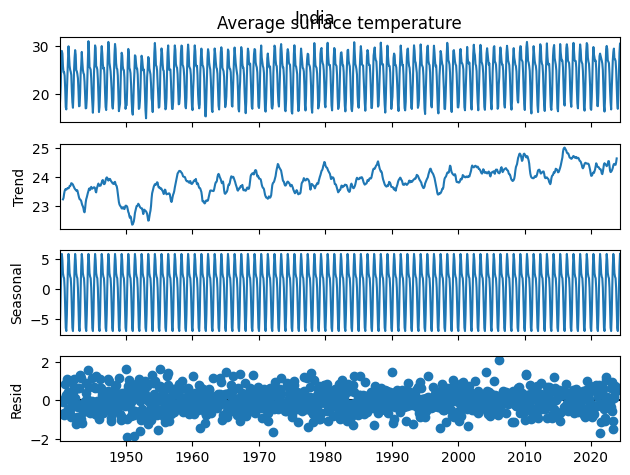

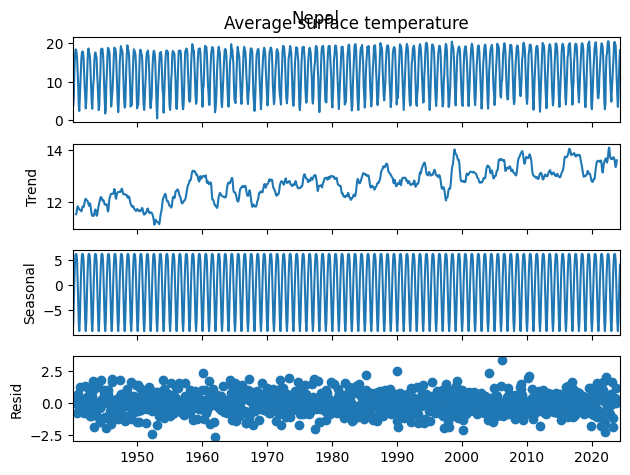

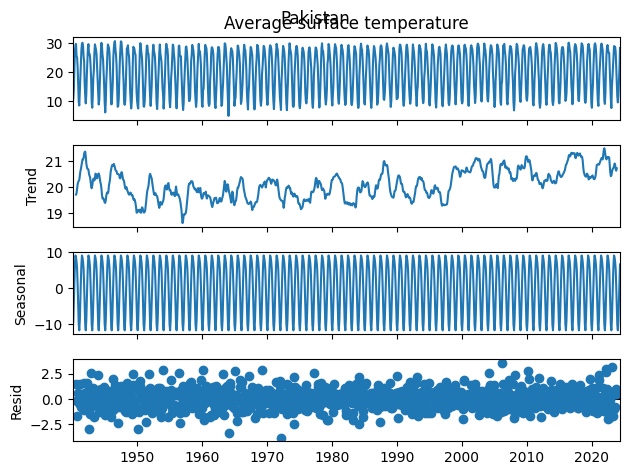

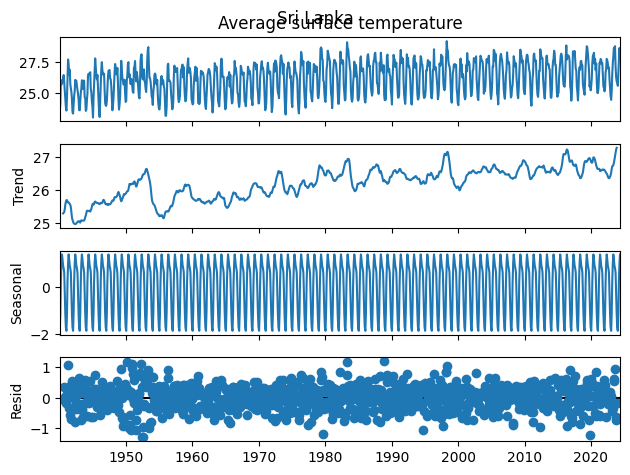

In [15]:
# draw seasonal decomposition plot  for each entity
from statsmodels.tsa.seasonal import seasonal_decompose
for entity, data in df.groupby('Entity'):
    result = seasonal_decompose(data.set_index('Day')['Average surface temperature'], model='additive', period=12)
    result.plot()
    plt.suptitle(entity)
    plt.show()

In [16]:
df.describe()

,year,Day,Average surface temperature,Average surface temperature.1
count,7091.000000,7091,7091.000000,7091.000000
mean,1981.709773,1982-03-16 01:15:20.434353408,18.249433,18.261341
min,1940.000000,1940-01-15 00:00:00,-8.053486,6.239073
25%,1961.000000,1961-02-15 00:00:00,11.622354,12.173981
50%,1982.000000,1982-03-15 00:00:00,19.780483,20.147776
75%,2003.000000,2003-04-15 00:00:00,26.208868,24.830690
max,2024.000000,2024-05-15 00:00:00,30.944729,27.213984
std,24.371498,NaN,8.957172,6.842267
